In [1]:
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import simulations

In [5]:
from functools import partial

## First version of our model

### Simple situation without overtaking

In [6]:
A = np.array([0.5,0.5])
opt = np.array([10,6])
kap = 10
K=np.array([1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model1)

In [7]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([5,0,1,1]), derivative=d)

<IPython.core.display.Javascript object>


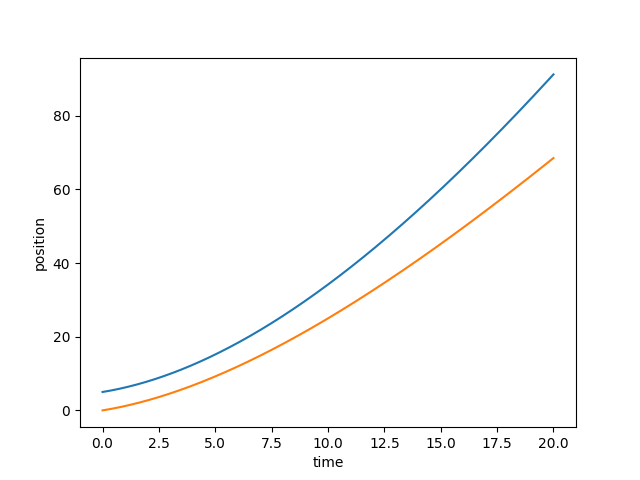

In [8]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Simple situation with overtaking

In [9]:
A = np.array([0.5,0.5])
opt = np.array([6,10])
kap = 5
K=np.array([1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model1)

In [10]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([5,0,1,1]), derivative=d)

<IPython.core.display.Javascript object>


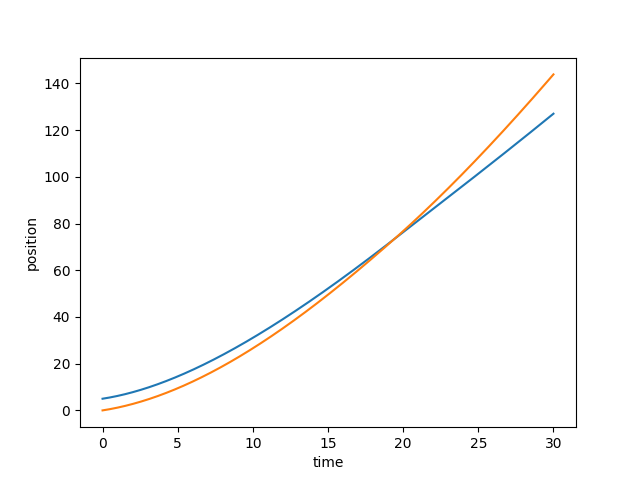

In [11]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Example of more complicated situation:

In [16]:
A = np.array([0.5,0.5,0.5,0.5])
opt = np.array([6,10,3,5])
kap = 10
K=np.array([1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model1)

In [17]:
t, v = simulations.euler(initial_time=0, end_time=40, number_of_points=1000000, initial_value=np.array([5,4,3,2,6,3,8,3]), derivative=d)

<IPython.core.display.Javascript object>


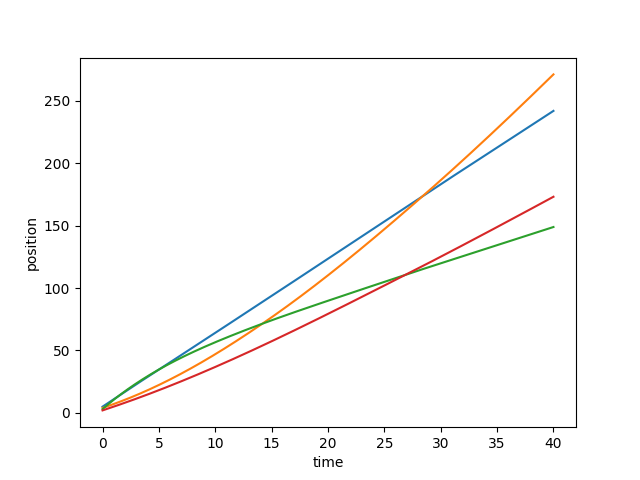

In [18]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### What if every drone flies with its' optimal velocity at the beginning?

In [19]:
A = np.array([0.5,0.5,0.5,0.5])
opt = np.array([5,6,7,8])
kap = 10
K=np.array([1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model1)

In [20]:
t, v = simulations.euler(initial_time=0, end_time=21, number_of_points=1000000, initial_value=np.array([3,2,1,0,5,6,7,8]), derivative=d)

<IPython.core.display.Javascript object>


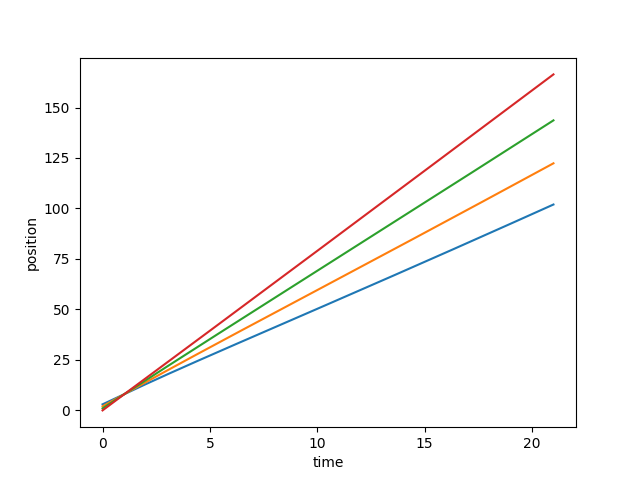

In [21]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### What happens if K=kappa for one of the drones?

Sometimes this drone will block the other drones:

In [23]:
A = np.array([0.5,0.5])
opt = np.array([2,10])
kap = 5
K=np.array([5,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model1)

In [24]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([5,0,2,2]), derivative=d)

<IPython.core.display.Javascript object>


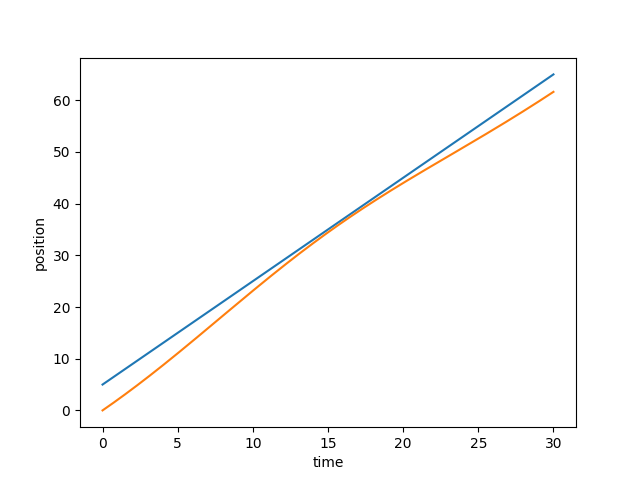

In [25]:
plt.plot(t,v[:,0],)
plt.plot(t,v[:,1])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

But sometimes it won't:

In [27]:
A = np.array([0.5,0.5])
opt = np.array([0.01,2])
kap = 5
K=np.array([5,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model1)

In [28]:
t, v = simulations.euler(initial_time=0, end_time=20, number_of_points=1000000, initial_value=np.array([5,0,0.01,1]), derivative=d)

<IPython.core.display.Javascript object>


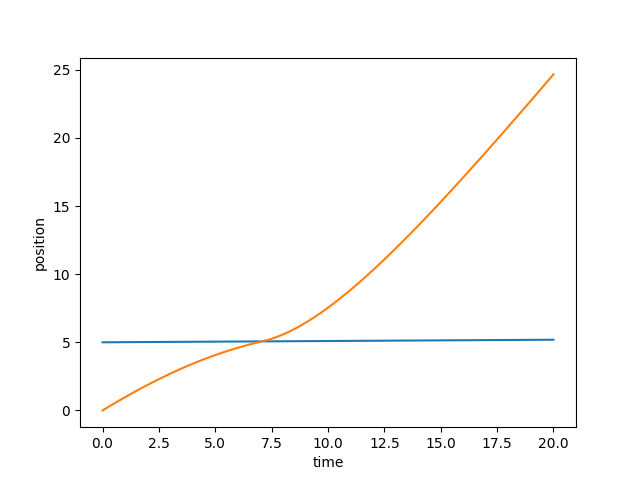

In [29]:
plt.plot(t,v[:,0],)
plt.plot(t,v[:,1])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

## Second version of our model (sum of exponents multiplied by velocity)

### Situation 1: each drone starts with its' optimal velocity, drones are sorted according to their optimal velocities. Each drone has the same K=1 and A=0.5.

In [42]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([5,4,3,2,1])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [43]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,5,4,3,2,1]), derivative=d)

<IPython.core.display.Javascript object>


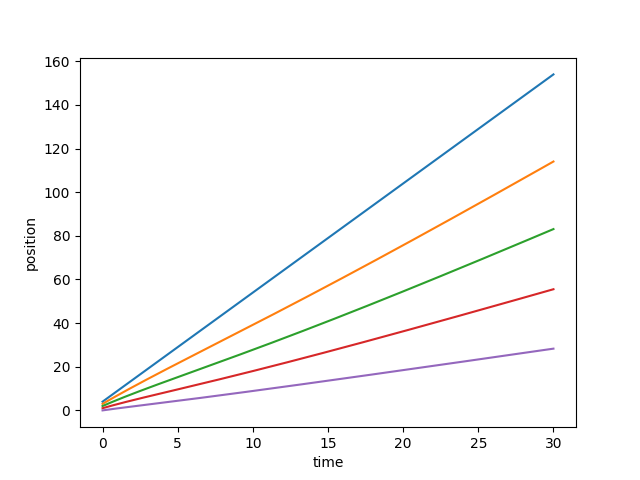

In [44]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 2: each drone starts with its' optimal velocity, but drones are not sorted according to their optimal velocities. Each drone has the same K=1 and A=0.5.

In [50]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([1,2,3,4,5])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [51]:
t, v = simulations.euler(initial_time=0, end_time=15, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,1,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


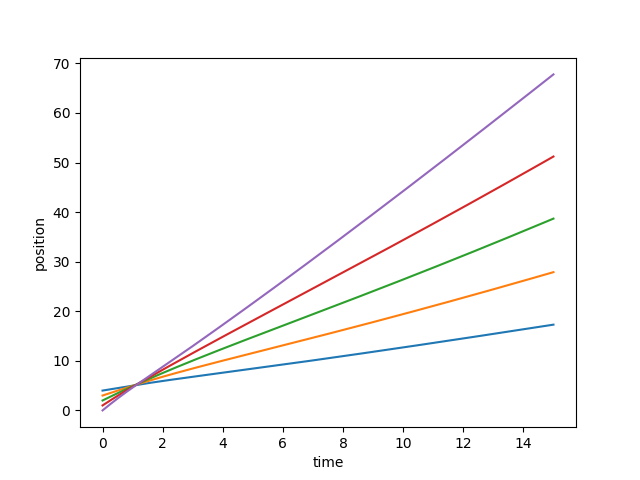

In [52]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 3: first drone has K>>kappa and is very slow.

In [65]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([0.01,2,3,4,5])
kap = 10
K=np.array([100,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [66]:
t, v = simulations.euler(initial_time=0, end_time=30, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,0.01,2,3,4,5]), derivative=d)

<IPython.core.display.Javascript object>


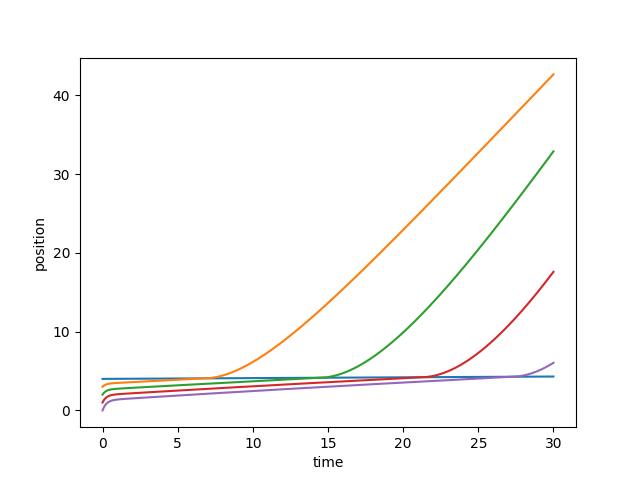

In [67]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 4: several drones have the same starting position and zero velocity, they are the same except for maximum acceleration.

In [84]:
A = np.array([10,5,1,0.5,0.1])
opt = np.array([30,30,30,30,30])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [85]:
t, v = simulations.euler(initial_time=0, end_time=60, number_of_points=1000000, initial_value=np.array([0,0,0,0,0,0,0,0,0,0]), derivative=d)

<IPython.core.display.Javascript object>


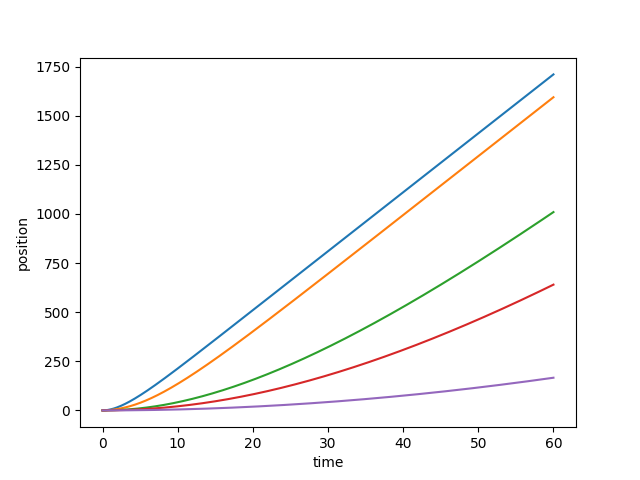

In [86]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()

### Situation 5: some complicated situation with lots of overtaking.

In [107]:
A = np.array([0.5,0.5,0.5,0.5,0.5])
opt = np.array([7,10,3,5,2])
kap = 10
K=np.array([1,1,1,1,1])
om = 10
d = partial(simulations.derivative,A=A,optimal_velocity=opt,kappa=kap,K=K,omega=om,model=simulations.model2)

In [108]:
t, v = simulations.euler(initial_time=0, end_time=100, number_of_points=1000000, initial_value=np.array([4,3,2,1,0,7,3,15,0,25]), derivative=d)

<IPython.core.display.Javascript object>


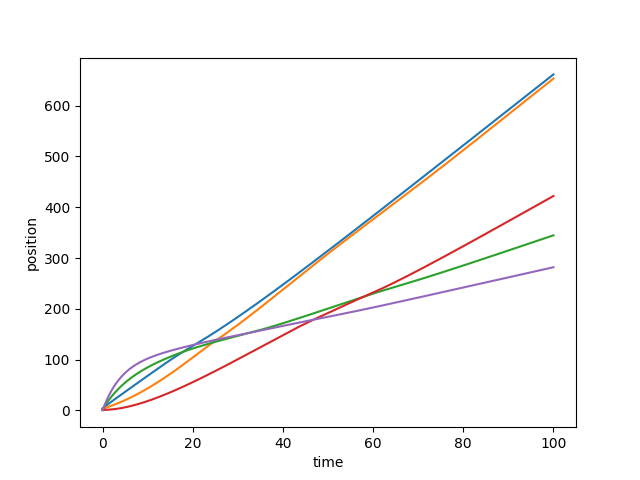

In [109]:
plt.plot(t,v[:,0])
plt.plot(t,v[:,1])
plt.plot(t,v[:,2])
plt.plot(t,v[:,3])
plt.plot(t,v[:,4])
plt.xlabel("time")
plt.ylabel("position")
plt.show()